# INTEREST RATES Vs CRYPTO 

# DATA ANALYSIS 


In [1]:
import pandas as pd 
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import itertools
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import statsmodels.api as sm
from sklearn.neighbors import KNeighborsRegressor
from pandas.plotting import lag_plot
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm
from pylab import rcParams


/Users/chrislacarte/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [44]:
# Load the data 
# main_df = pd.read_csv("../final_data/final_df.csv")
crypto_df = pd.read_csv("../final_data/crypto_series.csv")
# currency_df = pd.read_csv("../final_data/currency_series.csv")
commodity_df = pd.read_csv("../final_data/commodity_series.csv")
rates_df = pd.read_csv("../final_data/rates_series.csv")

In [45]:
commodity_df

,date,wti_oil_price,brent_oil_p,gold_p,silver_p,steel_price
0,04/01/2016,36.81,37.22,1075.2,13.8400,0.7704
1,06/01/2016,33.97,34.23,1091.9,13.9800,0.7154
2,07/01/2016,33.29,33.75,1107.8,14.3400,0.6355
3,08/01/2016,33.20,33.55,1097.9,13.9200,0.6398
4,11/01/2016,31.42,31.55,1096.2,13.8700,0.6573
...,...,...,...,...,...,...
1282,20/12/2021,68.69,70.51,1794.6,22.2700,3.8972
1283,21/12/2021,71.10,72.85,1788.7,22.4940,4.0883
1284,22/12/2021,72.82,74.69,1802.2,22.7860,4.1265
1285,23/12/2021,73.89,76.26,1811.7,22.9130,4.1169


Only BTC and ETH showed beuing correlated nore than 0.5

In [3]:
crypto_btc_eth = crypto_df[['date','btc_p',"eth_p"]]
rates_df_ = pd.merge(rates_df,crypto_btc_eth,how="inner",on='date')

In [4]:
rates_df_

,date,LIBOR,eonia,fed_rate,btc_p,eth_p
0,04/01/2016,0.37910,-0.335,0.37,426.57000,0.9600
1,06/01/2016,0.38550,-0.333,0.37,431.32000,0.9426
2,07/01/2016,0.40610,-0.321,0.41,429.99000,0.9500
3,08/01/2016,0.41440,-0.330,0.40,457.88354,0.9400
4,11/01/2016,0.43456,-0.348,0.41,449.13000,1.0000
...,...,...,...,...,...,...
1282,20/12/2021,0.07250,-0.491,0.08,46688.40000,3924.3700
1283,21/12/2021,0.07288,-0.486,0.08,46898.10000,3941.8200
1284,22/12/2021,0.07050,-0.489,0.08,48925.90000,4018.2000
1285,23/12/2021,0.07513,-0.491,0.08,48624.90000,3980.4400


In [5]:
# Set datetime index :
rates_df_ = rates_df_.set_index('date')

In [6]:
rates_df_ 

,LIBOR,eonia,fed_rate,btc_p,eth_p
date,,,,,
04/01/2016,0.37910,-0.335,0.37,426.57000,0.9600
06/01/2016,0.38550,-0.333,0.37,431.32000,0.9426
07/01/2016,0.40610,-0.321,0.41,429.99000,0.9500
08/01/2016,0.41440,-0.330,0.40,457.88354,0.9400
11/01/2016,0.43456,-0.348,0.41,449.13000,1.0000
...,...,...,...,...,...
20/12/2021,0.07250,-0.491,0.08,46688.40000,3924.3700
21/12/2021,0.07288,-0.486,0.08,46898.10000,3941.8200
22/12/2021,0.07050,-0.489,0.08,48925.90000,4018.2000


# DESCRIPTIVE ANALYSIS 

CURRENCY PRICES (in $) Vs CRYPTO PRICES

In [7]:
rates_df_ 

,LIBOR,eonia,fed_rate,btc_p,eth_p
date,,,,,
04/01/2016,0.37910,-0.335,0.37,426.57000,0.9600
06/01/2016,0.38550,-0.333,0.37,431.32000,0.9426
07/01/2016,0.40610,-0.321,0.41,429.99000,0.9500
08/01/2016,0.41440,-0.330,0.40,457.88354,0.9400
11/01/2016,0.43456,-0.348,0.41,449.13000,1.0000
...,...,...,...,...,...
20/12/2021,0.07250,-0.491,0.08,46688.40000,3924.3700
21/12/2021,0.07288,-0.486,0.08,46898.10000,3941.8200
22/12/2021,0.07050,-0.489,0.08,48925.90000,4018.2000


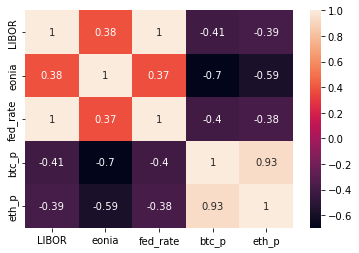

In [8]:
#Check multicolinearity:
correlations_matrix = rates_df_.corr()
correlations_matrix

sns.heatmap(correlations_matrix, annot=True)
plt.show()

# ANALYSIS Interest Rates Vs BTC

In [16]:
# # # Let's plot the features to visually inspect them.
# # Scatter plots

# ######### Vs BTC #############
# plt.scatter(x=rates_df_['LIBOR'], y=rates_df_['btc_p'])
# plt.title("LIB/BTC")
# plt.show()
# plt.scatter(x=rates_df_['eonia'], y=rates_df_['btc_p'])
# plt.title("EON/BTC")
# plt.show()
# plt.scatter(x=rates_df_['fed_rate'], y=rates_df_['btc_p'])
# plt.title("FED/BTC")
# plt.show()

In [10]:
# X/Y split 
y_btc = rates_df_['btc_p']
X_btc = rates_df_.drop(['btc_p', "eth_p"], axis=1)
# Train/Test split
X_btc_train, X_btc_test, y_btc_train, y_btc_test = train_test_split(X_btc, y_btc,test_size=0.2)
# # Time series Train. test split
# X_btc_train, X_btc_test = X_btc[:-50], X_btc[-50:]
# y_btc_train, y_btc_test = y_btc[:-50], y_btc[-50:]

LINEAR REGRESSION

In [11]:
lm = linear_model.LinearRegression()
lm.fit(X_btc_train,y_btc_train)
y_pred=lm.predict(X_btc_test)
print("R2-score is:",lm.score(X_btc_train,y_btc_train))
print("MSE is :",mean_squared_error(y_pred,y_btc_test))

# Normal Train Test split
# #  R2-score is: 0.5264976642399185
# #  MSE is : 111681340.56965812
# Not extremely good model 

# Time Series Train Test split
# #  R2-score is: 0.4804258328184856
# # MSE is : 922152612.2864013
# Not extremely good model 

R2-score is: 0.5199567811808541
MSE is : 137169690.3604207


KNN 

In [17]:
# KNN 
# 16 neighbors throws the best result 

KNN = KNeighborsRegressor(n_neighbors=16)
KNN.fit(X_btc_train, y_btc_train)
pred_knn = (KNN.predict(X_btc_test))
score = KNN.score(X_btc_test, y_btc_test)
print('KNN score is:', score)
print("MSE is :",mean_squared_error(KNN.predict(X_btc_test),y_btc_test))

# Normal Train Test split
# print(pred_knn)
# KNN score is: 0.9024256368457877
# MSE is : 22011308.339447465
# The result is very good,....does it really make sense being a timeseries ???

# Time Series Train Test split
# KNN score is: -4.106361368497492
# MSE is : 205797203.61444762

KNN score is: 0.9489633975714278
MSE is : 14208088.923618913


# ANALYSIS Interest Rates Vs ETH

In [15]:
# # Let's plot the features to visually inspect them.
# # Scatter plots

# ######### Vs ETH #############

# plt.scatter(x=rates_df_['LIBOR'], y=rates_df_['eth_p'])
# plt.title("LIB/ETH")
# plt.show()
# plt.scatter(x=rates_df_['eonia'], y=rates_df_['eth_p'])
# plt.title("EON/ETH")
# plt.show()
# plt.scatter(x=rates_df_['fed_rate'], y=rates_df_['eth_p'])
# plt.title("FED/ETH")
# plt.show()

In [18]:
# X/Y split 
y_eth = rates_df_['eth_p']
X_eth = rates_df_.drop(['btc_p', "eth_p"], axis=1)

# Train/Test split
X_eth_train, X_eth_test, y_eth_train, y_eth_test = train_test_split(X_eth, y_eth,test_size=0.2)

# # Time series Train. test split
# X_eth_train, X_eth_test = X_eth[:-50], X_eth[-50:]
# y_eth_train, y_eth_test = y_eth[:-50], y_eth[-50:]

LINEAR REGRESSION

In [19]:
lm = linear_model.LinearRegression()
lm.fit(X_btc_train,y_btc_train)
y_pred=lm.predict(X_btc_test)
print("R2-score is:",lm.score(X_btc_train,y_btc_train))
print("MSE is :",mean_squared_error(y_pred,y_btc_test))

# Normal Train Test split
# #  R2-score is: 0.5108342034799391
# #  MSE is : 139467099.9510077
# Not extremely good model 

# Time series Train Test split 
# R2-score is: 0.5166033755046859
# MSE is : 94555269.08232574

R2-score is: 0.5199567811808541
MSE is : 137169690.3604207


KNN

In [20]:
# KNN 
# 8 neighbors throws the best result 

KNN = KNeighborsRegressor(n_neighbors=8)
KNN.fit(X_eth_train, y_eth_train)
pred_knn = (KNN.predict(X_eth_test))
score = KNN.score(X_eth_test, y_eth_test)
print('KNN score is:', score)
print("MSE is :",mean_squared_error(KNN.predict(X_eth_test),y_eth_test))
# print(pred_knn)

# Normal Train Test split
# # KNN score is: 0.9007957942522475
# # MSE is : 110156.5688880342
# The result is very good,....does it really make sense being a timeseries ???

# Time series Train Test split 
# KNN score is: -13.582910852414855
# MSE is : 2384237.556900751


KNN score is: 0.9306104511958768
MSE is : 72621.30690579665


COMMODITY PRICES (in $) Vs CRYPTO PRICES

Commodities prices are correlated with all cryptos

In [46]:
commodity_df

,date,wti_oil_price,brent_oil_p,gold_p,silver_p,steel_price
0,04/01/2016,36.81,37.22,1075.2,13.8400,0.7704
1,06/01/2016,33.97,34.23,1091.9,13.9800,0.7154
2,07/01/2016,33.29,33.75,1107.8,14.3400,0.6355
3,08/01/2016,33.20,33.55,1097.9,13.9200,0.6398
4,11/01/2016,31.42,31.55,1096.2,13.8700,0.6573
...,...,...,...,...,...,...
1282,20/12/2021,68.69,70.51,1794.6,22.2700,3.8972
1283,21/12/2021,71.10,72.85,1788.7,22.4940,4.0883
1284,22/12/2021,72.82,74.69,1802.2,22.7860,4.1265
1285,23/12/2021,73.89,76.26,1811.7,22.9130,4.1169


In [47]:
crypto_df

,date,btc_p,ltc_p,eth_p,xrp_p,doge_p
0,04/01/2016,426.57000,3.49300,0.9600,0.007418,0.000224
1,06/01/2016,431.32000,3.47900,0.9426,0.005809,0.000234
2,07/01/2016,429.99000,3.44000,0.9500,0.006787,0.000302
3,08/01/2016,457.88354,3.58399,0.9400,0.005906,0.000223
4,11/01/2016,449.13000,3.52817,1.0000,0.008102,0.000221
...,...,...,...,...,...,...
1282,20/12/2021,46688.40000,153.22000,3924.3700,0.879828,0.879828
1283,21/12/2021,46898.10000,152.75000,3941.8200,0.947646,0.947646
1284,22/12/2021,48925.90000,154.70000,4018.2000,0.954699,0.954699
1285,23/12/2021,48624.90000,155.41000,3980.4400,0.993285,0.993285


In [48]:
# crypto_all = crypto_df[['date','btc_p','ltc_p','eth_p','xrp_p','doge_p']]
comm_df = pd.merge(commodity_df,crypto_df,how="inner",on='date')

In [49]:
# Set datetime index :
comm_df = comm_df.set_index('date')

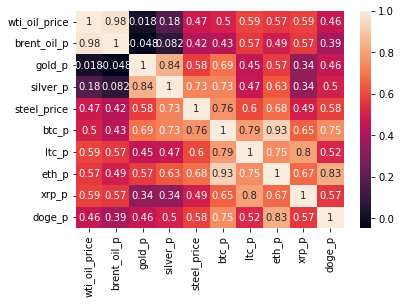

In [50]:
#Check multicolinearity:
correlations_matrix_com = comm_df.corr()

sns.heatmap(correlations_matrix_com, annot=True)
plt.show()

We drop BRENT_OIL as is highly correlated to WTI_OIL, which has the hioghest correlation wioth the crypto prices (targets)

In [51]:
comm_df = comm_df.drop('brent_oil_p', axis=1)

# Commodities VS BTC

In [52]:
comm_df

,wti_oil_price,gold_p,silver_p,steel_price,btc_p,ltc_p,eth_p,xrp_p,doge_p
date,,,,,,,,,
04/01/2016,36.81,1075.2,13.8400,0.7704,426.57000,3.49300,0.9600,0.007418,0.000224
06/01/2016,33.97,1091.9,13.9800,0.7154,431.32000,3.47900,0.9426,0.005809,0.000234
07/01/2016,33.29,1107.8,14.3400,0.6355,429.99000,3.44000,0.9500,0.006787,0.000302
08/01/2016,33.20,1097.9,13.9200,0.6398,457.88354,3.58399,0.9400,0.005906,0.000223
11/01/2016,31.42,1096.2,13.8700,0.6573,449.13000,3.52817,1.0000,0.008102,0.000221
...,...,...,...,...,...,...,...,...,...
20/12/2021,68.69,1794.6,22.2700,3.8972,46688.40000,153.22000,3924.3700,0.879828,0.879828
21/12/2021,71.10,1788.7,22.4940,4.0883,46898.10000,152.75000,3941.8200,0.947646,0.947646
22/12/2021,72.82,1802.2,22.7860,4.1265,48925.90000,154.70000,4018.2000,0.954699,0.954699


In [61]:
comm_btc = comm_df[['wti_oil_price','gold_p','silver_p','steel_price','btc_p']]

# comm_eth = comm_df[['wti_oil_price','gold_p','silver_p','steel_price','eth_p']]
# comm_xrp = comm_df[['wti_oil_price','gold_p','silver_p','steel_price','xrp_p']]
# comm_doge = comm_df[['wti_oil_price','gold_p','silver_p','steel_price','doge_p']]

In [82]:
# X/Y split 
y_com_btc = comm_btc['btc_p']
X_com_btc = comm_btc.drop(['btc_p'], axis=1)
# Train/Test split
X_com_btc_train, X_com_btc_test, y_com_btc_train, y_com_btc_test = train_test_split(X_com_btc, y_com_btc,test_size=0.2)
# # Time series Train. test split
# X_com_btc_train, X_com_btc_test = X_com_btc[:-50], X_com_btc[-50:]
# y_com_btc_train, y_com_btc_test = y_com_btc[:-50], y_com_btc[-50:]

Linear Model

In [72]:
lm = linear_model.LinearRegression()
lm.fit(X_com_btc_train,y_com_btc_train)
y_pred=lm.predict(X_com_btc_test)
print("R2-score is:",lm.score(X_com_btc_train,y_com_btc_train))
print("MSE is :",mean_squared_error(y_pred,y_com_btc_test))

# Normal Train Test split
# # R2-score is: 0.7651422415347967
# # MSE is : 54744983.68127937
# Good model 

# Time Series Train Test split
# # R2-score is: 0.780038953617233
# # MSE is : 854480606.1924492
# Not extremely good model 

R2-score is: 0.780038953617233
MSE is : 854480606.1924492


KNN model 

In [93]:
# KNN 
# 8 neighbors throws the best result 

KNN = KNeighborsRegressor(n_neighbors=8)
KNN.fit(X_com_btc_train, y_com_btc_train)
pred_knn = (KNN.predict(X_com_btc_test))
score = KNN.score(X_com_btc_test, y_com_btc_test)
print('KNN score is:', score)
print("MSE is :",mean_squared_error(KNN.predict(X_com_btc_test),y_com_btc_test))

# Normal Train Test split
# print(pred_knn)

# # KNN score is: 0.9652534522586609
# # MSE is : 7384451.087127451
# The result is very good,....does it really make sense being a timeseries ???

# Time Series Train Test split
# KNN score is: -6.175297235564297
# MSE is : 289179711.26984763


KNN score is: 0.9652534522586609
MSE is : 7384451.087127451


# Commodities VS LTC


In [95]:
comm_ltc = comm_df[['wti_oil_price','gold_p','silver_p','steel_price','ltc_p']]

In [96]:
comm_ltc

,wti_oil_price,gold_p,silver_p,steel_price,ltc_p
date,,,,,
04/01/2016,36.81,1075.2,13.8400,0.7704,3.49300
06/01/2016,33.97,1091.9,13.9800,0.7154,3.47900
07/01/2016,33.29,1107.8,14.3400,0.6355,3.44000
08/01/2016,33.20,1097.9,13.9200,0.6398,3.58399
11/01/2016,31.42,1096.2,13.8700,0.6573,3.52817
...,...,...,...,...,...
20/12/2021,68.69,1794.6,22.2700,3.8972,153.22000
21/12/2021,71.10,1788.7,22.4940,4.0883,152.75000
22/12/2021,72.82,1802.2,22.7860,4.1265,154.70000


In [102]:
# X/Y split 
y_com_ltc = comm_ltc['ltc_p']
X_com_ltc = comm_ltc.drop(['ltc_p'], axis=1)
# Train/Test split
# X_com_ltc_train, X_com_ltc_test, y_com_ltc_train, y_com_ltc_test = train_test_split(X_com_ltc, y_com_ltc,test_size=0.2)
# # Time series Train. test split
X_com_ltc_train, X_com_ltc_test = X_com_ltc[:-50], X_com_ltc[-50:]
y_com_ltc_train, y_com_ltc_test = y_com_ltc[:-50], y_com_ltc[-50:]

Linear Model

In [103]:
lm = linear_model.LinearRegression()
lm.fit(X_com_ltc_train,y_com_ltc_train)
y_pred=lm.predict(X_com_ltc_test)
print("R2-score is:",lm.score(X_com_ltc_train,y_com_ltc_train))
print("MSE is :",mean_squared_error(y_pred,y_com_ltc_test))

# Normal Train Test split
# # R2-score is: 0.5764720464669788
# # MSE is : 2732.3903616292296
# not extremely model 

# Time Series Train Test split
# R2-score is: 0.5166721073431297
# MSE is : 1154.538378758158
# Not extremely good model 

R2-score is: 0.5166721073431297
MSE is : 1154.538378758158


KNN model

In [105]:
# KNN 
# 8 neighbors throws the best result 

KNN = KNeighborsRegressor(n_neighbors=8)
KNN.fit(X_com_ltc_train, y_com_ltc_train)
pred_knn = (KNN.predict(X_com_ltc_test))
score = KNN.score(X_com_ltc_test, y_com_ltc_test)
print('KNN score is:', score)
print("MSE is :",mean_squared_error(KNN.predict(X_com_ltc_test),y_com_ltc_test))

# Normal Train Test split
# print(pred_knn)

# # KNN score is: 0.7780649944962228
# # MSE is : 1231.793628258631
# The result is very good,....does it really make sense being a timeseries ???

# Time Series Train Test split
# KNN score is: -0.829051198481755
# MSE is : 1648.7710282187502


KNN score is: -0.829051198481755
MSE is : 1648.7710282187502


# Commodities Vs ETH 

In [106]:
comm_eth = comm_df[['wti_oil_price','gold_p','silver_p','steel_price','eth_p']]

In [107]:
comm_eth

,wti_oil_price,gold_p,silver_p,steel_price,eth_p
date,,,,,
04/01/2016,36.81,1075.2,13.8400,0.7704,0.9600
06/01/2016,33.97,1091.9,13.9800,0.7154,0.9426
07/01/2016,33.29,1107.8,14.3400,0.6355,0.9500
08/01/2016,33.20,1097.9,13.9200,0.6398,0.9400
11/01/2016,31.42,1096.2,13.8700,0.6573,1.0000
...,...,...,...,...,...
20/12/2021,68.69,1794.6,22.2700,3.8972,3924.3700
21/12/2021,71.10,1788.7,22.4940,4.0883,3941.8200
22/12/2021,72.82,1802.2,22.7860,4.1265,4018.2000


In [127]:
# X/Y split 
y_com_eth = comm_eth['eth_p']
X_com_eth = comm_eth.drop(['eth_p'], axis=1)
# Train/Test split
X_com_eth_train, X_com_eth_test, y_com_eth_train, y_com_eth_test = train_test_split(X_com_eth, y_com_eth,test_size=0.2)
# # Time series Train. test split
# X_com_eth_train, X_com_eth_test = X_com_eth[:-50], X_com_eth[-50:]
# y_com_eth_train, y_com_eth_test = y_com_eth[:-50], y_com_eth[-50:]

In [ ]:
Linear Model 

In [113]:
lm = linear_model.LinearRegression()
lm.fit(X_com_eth_train,y_com_eth_train)
y_pred=lm.predict(X_com_eth_test)
print("R2-score is:",lm.score(X_com_eth_train,y_com_eth_train))
print("MSE is :",mean_squared_error(y_pred,y_com_eth_test))

# Normal Train Test split
# R2-score is: 0.7206646011687614
# MSE is : 7391304.999816097
# not extremely model 

# Time Series Train Test split
# R2-score is: 0.7206646011687614
# MSE is : 7391304.999816097
# Not extremely good model 

R2-score is: 0.7206646011687614
MSE is : 7391304.999816097


In [ ]:
KNN Model 

In [128]:
# KNN 
# 8 neighbors throws the best result 

KNN = KNeighborsRegressor(n_neighbors=10)
KNN.fit(X_com_eth_train, y_com_eth_train)
pred_knn = (KNN.predict(X_com_eth_test))
score = KNN.score(X_com_eth_test, y_com_eth_test)
print('KNN score is:', score)
print("MSE is :",mean_squared_error(KNN.predict(X_com_eth_test),y_com_eth_test))

# Normal Train Test split
# print(pred_knn)
# KNN score is: 0.8941640422701316
# MSE is : 97591.01115175014
# The result is very good,....does it really make sense being a timeseries ???

# Time Series Train Test split
# KNN score is: -13.533577343242271
# MSE is : 2376171.759435938


KNN score is: 0.8941640422701316
MSE is : 97591.01115175014


# Comodities Vs XRP

In [129]:
comm_xrp = comm_df[['wti_oil_price','gold_p','silver_p','steel_price','xrp_p']]

In [130]:
comm_xrp

,wti_oil_price,gold_p,silver_p,steel_price,xrp_p
date,,,,,
04/01/2016,36.81,1075.2,13.8400,0.7704,0.007418
06/01/2016,33.97,1091.9,13.9800,0.7154,0.005809
07/01/2016,33.29,1107.8,14.3400,0.6355,0.006787
08/01/2016,33.20,1097.9,13.9200,0.6398,0.005906
11/01/2016,31.42,1096.2,13.8700,0.6573,0.008102
...,...,...,...,...,...
20/12/2021,68.69,1794.6,22.2700,3.8972,0.879828
21/12/2021,71.10,1788.7,22.4940,4.0883,0.947646
22/12/2021,72.82,1802.2,22.7860,4.1265,0.954699


In [136]:
# X/Y split 
y_com_xrp = comm_xrp['xrp_p']
X_com_xrp = comm_xrp.drop(['xrp_p'], axis=1)
# Train/Test split
X_com_xrp_train, X_com_xrp_test, y_com_xrp_train, y_com_xrp_test = train_test_split(X_com_xrp, y_com_xrp,test_size=0.2)
# # Time series Train. test split
# X_com_xrp_train, X_com_xrp_test = X_com_xrp[:-50], X_com_xrp[-50:]
# y_com_xrp_train, y_com_xrp_test = y_com_xrp[:-50], y_com_xrp[-50:]

In [ ]:
Linear Model 

In [137]:
lm = linear_model.LinearRegression()
lm.fit(X_com_xrp_train,y_com_xrp_train)
y_pred=lm.predict(X_com_xrp_test)
print("R2-score is:",lm.score(X_com_xrp_train,y_com_xrp_train))
print("MSE is :",mean_squared_error(y_pred,y_com_xrp_test))

# Normal Train Test split
# R2-score is: 0.48880922465168697
# MSE is : 0.07847973036902865
# not extremely model 

# Time Series Train Test split
# R2-score is: 0.42238620625709367
# MSE is : 0.04736584470049505
# Not extremely good model 

R2-score is: 0.48880922465168697
MSE is : 0.07847973036902865


In [ ]:
KNN Model 

In [138]:
# KNN 
# 8 neighbors throws the best result 

KNN = KNeighborsRegressor(n_neighbors=8)
KNN.fit(X_com_xrp_train, y_com_xrp_train)
pred_knn = (KNN.predict(X_com_xrp_test))
score = KNN.score(X_com_xrp_test, y_com_xrp_test)
print('KNN score is:', score)
print("MSE is :",mean_squared_error(KNN.predict(X_com_xrp_test),y_com_xrp_test))

# Normal Train Test split
# print(pred_knn)
# KNN score is: 0.505231257388967
# MSE is : 0.06347268979135628
# The result is very good,....does it really make sense being a timeseries ???

# Time Series Train Test split
# KNN score is: -1.0950511490481958
# MSE is : 0.11505164480638932


KNN score is: 0.505231257388967
MSE is : 0.06347268979135628


# Comodities Vs DOGE

In [139]:
comm_doge = comm_df[['wti_oil_price','gold_p','silver_p','steel_price','doge_p']]

In [140]:
comm_doge

,wti_oil_price,gold_p,silver_p,steel_price,doge_p
date,,,,,
04/01/2016,36.81,1075.2,13.8400,0.7704,0.000224
06/01/2016,33.97,1091.9,13.9800,0.7154,0.000234
07/01/2016,33.29,1107.8,14.3400,0.6355,0.000302
08/01/2016,33.20,1097.9,13.9200,0.6398,0.000223
11/01/2016,31.42,1096.2,13.8700,0.6573,0.000221
...,...,...,...,...,...
20/12/2021,68.69,1794.6,22.2700,3.8972,0.879828
21/12/2021,71.10,1788.7,22.4940,4.0883,0.947646
22/12/2021,72.82,1802.2,22.7860,4.1265,0.954699


In [144]:
# X/Y split 
y_com_doge = comm_doge['doge_p']
X_com_doge = comm_doge.drop(['doge_p'], axis=1)
# Train/Test split
X_com_doge_train, X_com_doge_test, y_com_doge_train, y_com_doge_test = train_test_split(X_com_doge, y_com_doge,test_size=0.2)
# # Time series Train. test split
# X_com_doge_train, X_com_doge_test = X_com_doge[:-50], X_com_doge[-50:]
# y_com_doge_train, y_com_doge_test = y_com_doge[:-50], y_com_doge[-50:]

In [ ]:
Linear Model 

In [145]:
lm = linear_model.LinearRegression()
lm.fit(X_com_doge_train,y_com_doge_train)
y_pred=lm.predict(X_com_doge_test)
print("R2-score is:",lm.score(X_com_doge_train,y_com_doge_train))
print("MSE is :",mean_squared_error(y_pred,y_com_doge_test))

# Normal Train Test split
# R2-score is: 0.44378744964467753
# MSE is : 0.04264449396662385
# not extremely model 

# Time Series Train Test split
# R2-score is: 0.4298676633406352
# MSE is : 0.5705495680095781
# Not extremely good model 

R2-score is: 0.44378744964467753
MSE is : 0.04264449396662385


In [ ]:
KNN Model 

In [146]:
# KNN 
# 8 neighbors throws the best result 

KNN = KNeighborsRegressor(n_neighbors=8)
KNN.fit(X_com_doge_train, y_com_doge_train)
pred_knn = (KNN.predict(X_com_doge_test))
score = KNN.score(X_com_doge_test, y_com_doge_test)
print('KNN score is:', score)
print("MSE is :",mean_squared_error(KNN.predict(X_com_doge_test),y_com_doge_test))

# Normal Train Test split
# print(pred_knn)

# # KNN score is: 0.7780649944962228
# # MSE is : 1231.793628258631
# The result is very good,....does it really make sense being a timeseries ???

# Time Series Train Test split
# KNN score is: -1.1608917877750957
# MSE is : 0.24314576589635098


KNN score is: 0.6858192737315816
MSE is : 0.0221775101922104


In [56]:
!git add .

In [57]:
! git commit -m'all data ready to start analysis'

[main 23a9aab] all data ready to start analysis
 2 files changed, 2317 insertions(+), 11 deletions(-)
 create mode 100644 code/.ipynb_checkpoints/data_analysis-checkpoint.ipynb


In [58]:
! git push

Enumerating objects: 7, done.
Counting objects: 100% (7/7), done.
Delta compression using up to 4 threads
Compressing objects: 100% (5/5), done.
Writing objects: 100% (5/5), 450.57 KiB | 7.15 MiB/s, done.
Total 5 (delta 1), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (1/1), completed with 1 local object.
To https://github.com/chrislacarte/crypto_analysis
   2abf036..23a9aab  main -> main
